In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('untitled.tsv',sep='\t')

In [7]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [8]:
df = df.drop(columns=['Unnamed: 0'])

In [9]:
df.shape

(18249, 13)

In [145]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Here we have three object type,we will ensemble them to numerical datatype.
And there is no missing values in the dataset.

In [10]:
#converting the type of Date column to datetime type
df['Date']=pd.to_datetime(df['Date'])

In [11]:
#categorizing the dates into seasons

def season_(date):
    year=str(date.year)
    seasons={'spring': pd.date_range(start='21/03/'+year,end='20/06/'+year),
            'summer':pd.date_range(start='21/06/'+year,end='22/09/'+year),
            'autumn':pd.date_range(start='23/09/'+year,end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [12]:
#creating a new feature 'seasons' and assign the coreesponding season for the Date using map function over seasons function.
df['season']=df['Date'].map(season_)

In [13]:
df=df.drop(['Date'],axis=1)

In [9]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,winter
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,autumn
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,autumn
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,spring
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,spring
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,winter
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,winter
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,winter


In [14]:
#we have three object values which can be encoded into numerical data
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
cols=['type','region','season']
df[cols]=df[cols].apply(lambda x: label.fit_transform(x))

We dont have any missing value in the data set.

In [171]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,3
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,3
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,3
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,3


In [13]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,1.520741
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,1.131103
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,1.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,2.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,3.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,3.000000


In [82]:
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

Average price is highest in the year 2017

In [14]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
season          -0.014627
dtype: float64

In [ ]:
We have skewness in our data.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

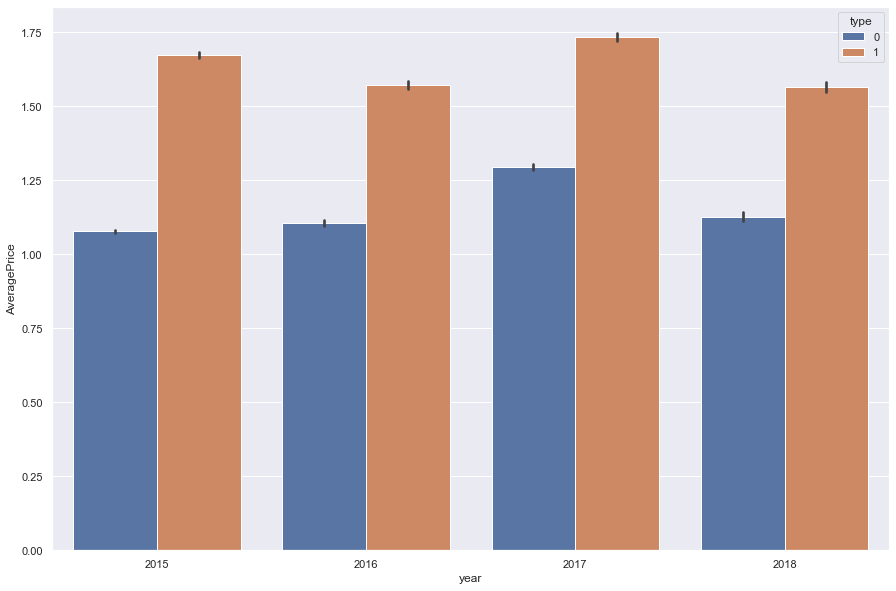

In [155]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'year', y = 'AveragePrice', hue = 'type', data = df)

Organic avocado are definitely more expensive than conventional avocado.
Prices of avocado increasing from 2015 to 2017 before falling back to similar prices in 2016.

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

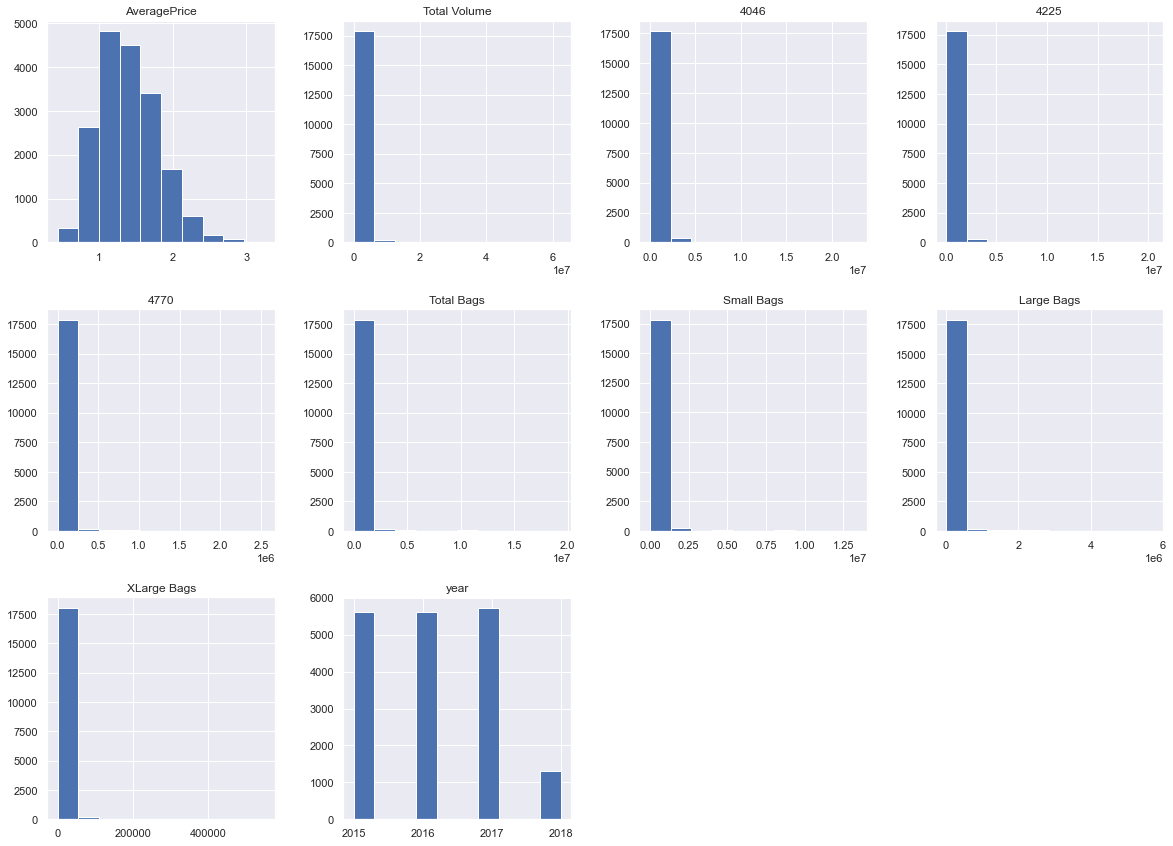

In [100]:
df.hist(figsize=(20,20),layout=(4,4))

Average Price is normally distributed.
rest of the data are left skewed.
we need to remove the skewness.

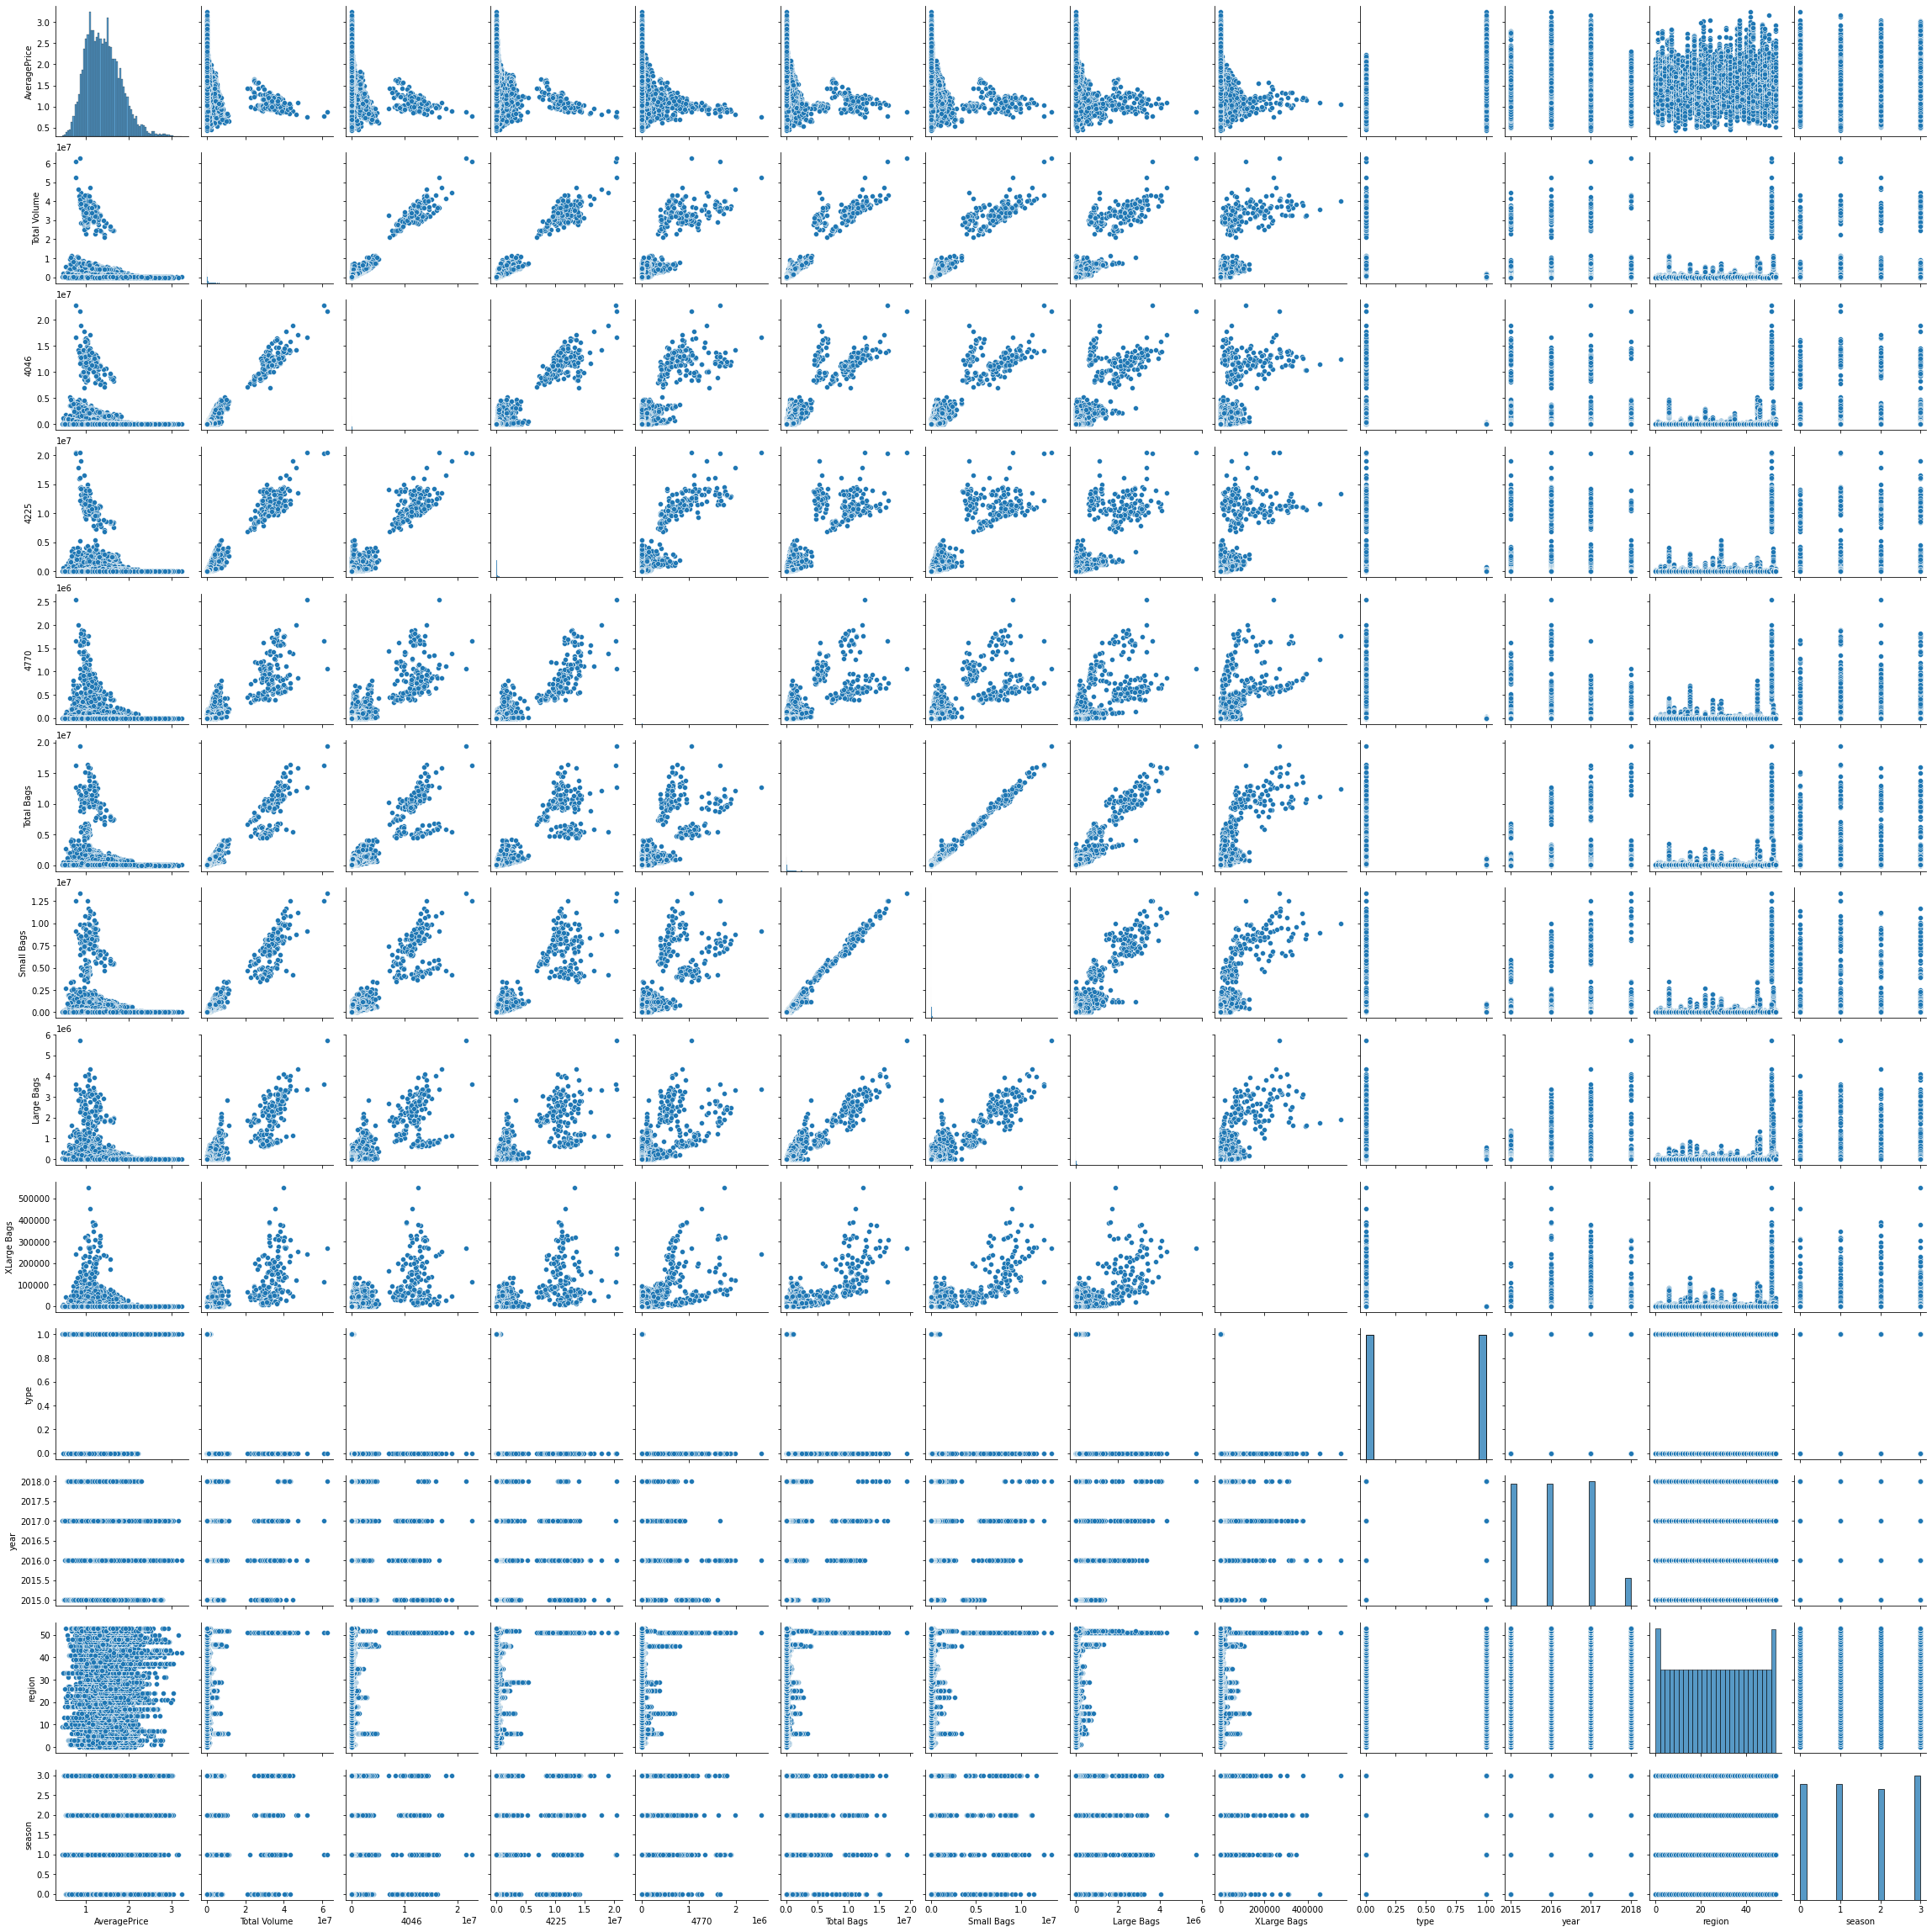

In [15]:
sns.pairplot(df)

# Removal of skewness

In [172]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
season          -0.014627
dtype: float64

There is skewness present in our dataset.We will remove skewness using square root transformation.

In [15]:
df=np.sqrt(df)

In [16]:
df.skew()

AveragePrice    0.196766
Total Volume    3.986597
4046            3.952972
4225            3.896355
4770            4.128605
Total Bags      4.128864
Small Bags      4.035940
Large Bags      4.134963
XLarge Bags     4.827368
type            0.000329
year            0.215017
region         -0.651869
season         -0.655119
dtype: float64

In [ ]:
Now we can see skewness is decreased.We can further process the data.

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
type            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
region          AxesSubplot(0.285345,0.321957;0.133621x0.16413)
season           AxesSubplot(0.44569,0.321957;0.133621x0.16413)
dtype: object

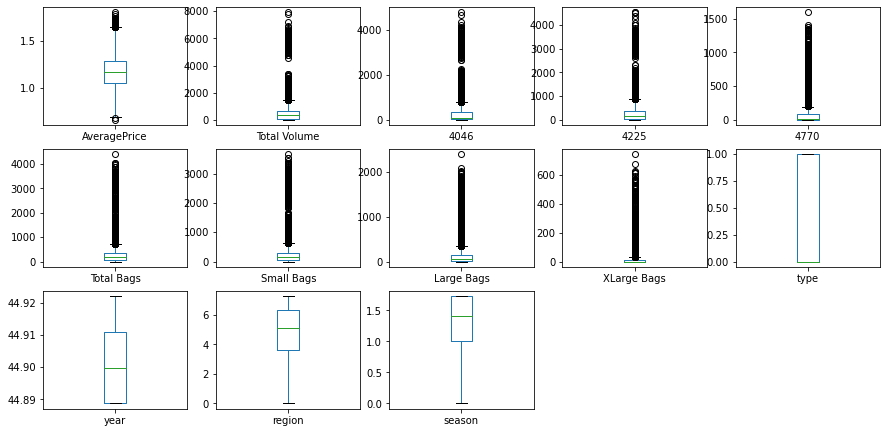

In [59]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

We have outliers in almost every column except year column.We need to remove the outliers from the dataset.

<AxesSubplot:>

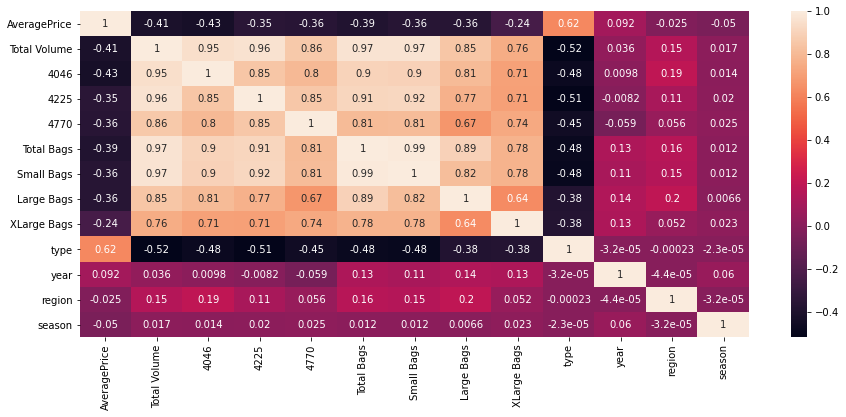

In [120]:
plt.figure(figsize=(15,6))                        #figure size
sns.heatmap(df.corr(),annot=True)

In [ ]:
We can see average price is largely dependent on the type of the avocados.
Total Bags,Small bags,large bags are showing near about same correlation with average price and show high
relation among tyhemselves,hence we can consider only the Total bags instead.
Similarly,Among 4225 and 4770 types we can consider 4225.
And Total Volume among,4046 type and total volume.
Region,Season and Year doesnot show much relation with average price.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

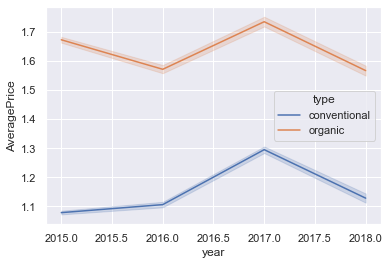

In [93]:
sns.lineplot("year","AveragePrice",hue='type',data=df)

There is hike between year 2016 and 2017 and decrease between 2017.5 and 2018 in both type of avocados.
And average price of organic avocados are differing from average price of conventional avocados.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

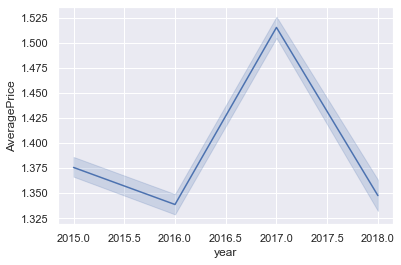

In [94]:
sns.lineplot("year","AveragePrice",data=df)

Average price has decreased from 2015 to 2016 and again it has increased throughout 2016 and gained the peak in start of
2017 but decreases throughout 2017 having average value near about same as 2016 in start of year start 2018.

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

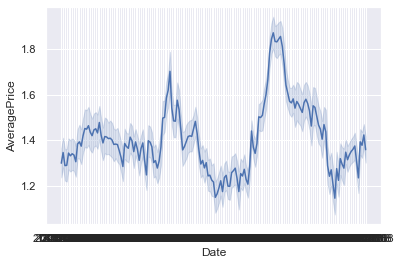

In [36]:
sns.lineplot("Date","AveragePrice",data=df)

Average prices of avocado has increased over the years.

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

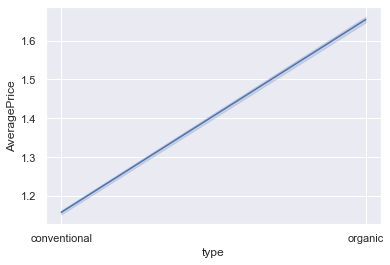

In [38]:
sns.lineplot("type","AveragePrice",data=df)

Conventional type has low average price as compared to organic.

<AxesSubplot:xlabel='season', ylabel='AveragePrice'>

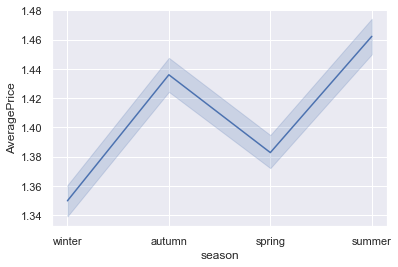

In [56]:
sns.lineplot("season","AveragePrice",data=df)

Average price is lowest in winter grows eventually during autumn and again certain decrease is there till spring 
then continues to rise to peak average price during summer.

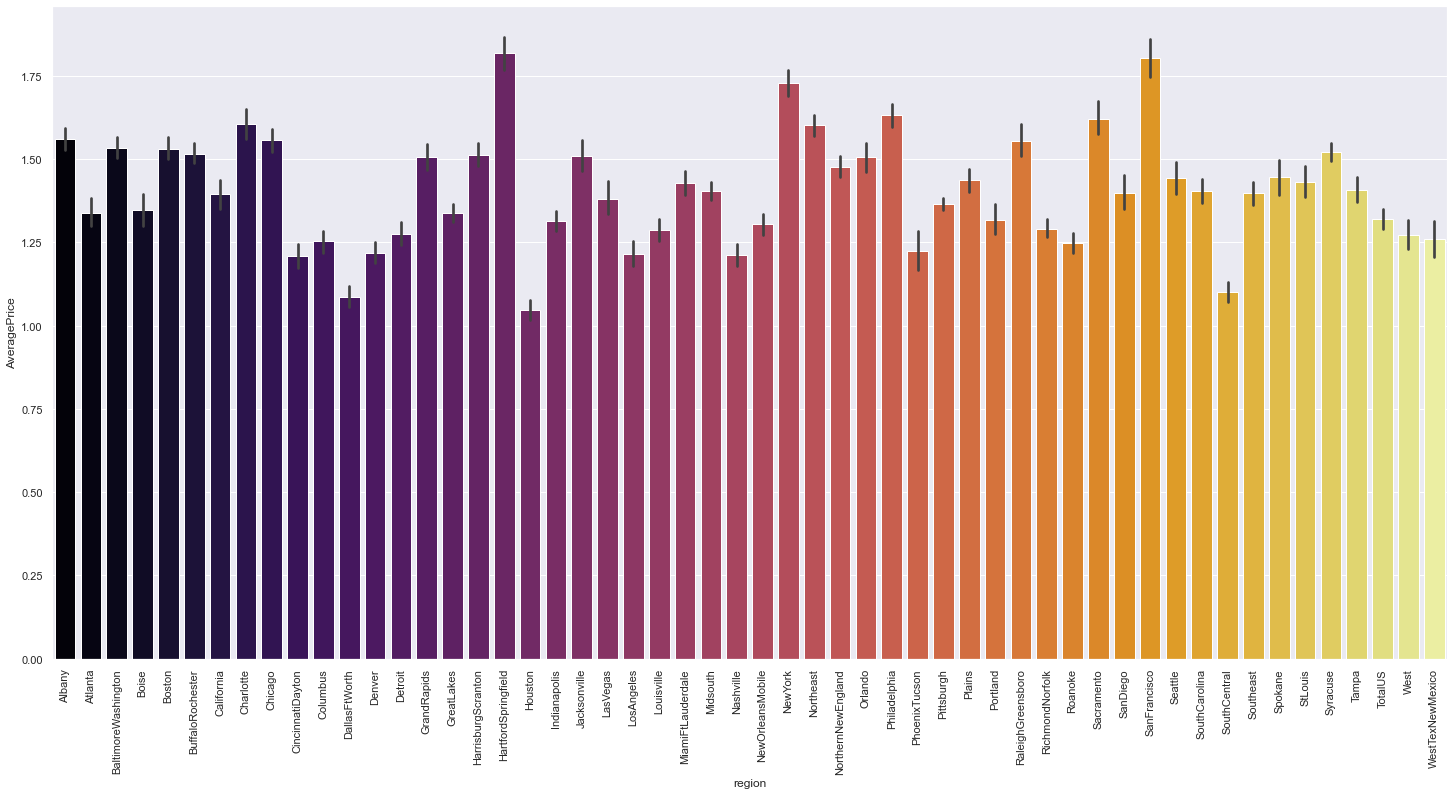

In [73]:
plt.figure(figsize=(25,12))
sns.barplot(x='region',y='AveragePrice',data=df,palette='inferno')
plt.xticks(rotation=90)
plt.show()

Hartford Springfield and San Fransico has highest average prices.
Houston has the least average price among all regions followed by south central and denver.

<AxesSubplot:xlabel='year', ylabel='count'>

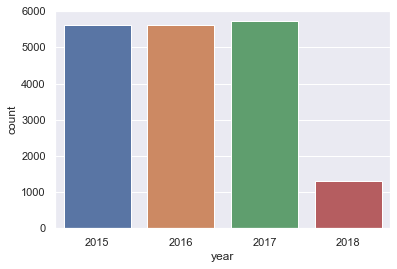

In [74]:
#bar chart to indicate the year
sns.countplot(x='year',data=df)

2017 has the highest count whereas 2018 has less count.

Data Preprocessing

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  float64
 10  year          18249 non-null  float64
 11  region        18249 non-null  float64
 12  season        18249 non-null  float64
dtypes: float64(13)
memory usage: 1.8 MB


In [11]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,3
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,0


In [63]:
df['type'].value_counts()

0.0    9126
1.0    9123
Name: type, dtype: int64

# Removing the outliers

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
dfnew=df[(z<3).all(axis=1)]
dfnew.shape

(17206, 13)

In [65]:
dfnew

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
0,1.153256,253.449443,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,0.0,44.888751,0.00000,1.732051
1,1.161895,234.258362,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,0.0,44.888751,0.00000,0.000000
2,0.964365,343.831674,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,0.0,44.888751,0.00000,0.000000
3,1.039230,281.055422,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,0.0,44.888751,0.00000,1.000000
4,1.131371,225.919455,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,0.0,44.888751,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.276715,130.670693,45.243342,39.104987,0.000000,116.183777,114.310192,20.781001,0.0,1.0,44.922155,7.28011,1.000000
18245,1.307670,117.847529,34.521008,58.579006,0.000000,96.254039,94.551785,18.022209,0.0,1.0,44.922155,7.28011,1.732051
18246,1.367479,117.331837,34.524194,49.525650,26.980363,96.923217,96.704705,6.504614,0.0,1.0,44.922155,7.28011,1.732051
18247,1.389244,127.299725,39.084908,54.598901,26.963123,104.735572,104.496603,7.071068,0.0,1.0,44.922155,7.28011,1.732051


In [66]:
dfnew.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
count,17206.000000,17206.000000,17206.000000,17206.000000,17206.000000,17206.000000,17206.000000,17206.000000,17206.000000,17206.000000,17206.000000,17206.000000,17206.000000
mean,1.180536,413.652648,198.510978,236.380626,46.064939,227.938491,194.447216,91.100111,11.377364,0.527025,44.901421,4.782939,1.041113
std,0.165079,405.721616,261.944996,258.788907,75.408988,212.329605,191.295028,116.242764,26.373968,0.499284,0.010465,1.783663,0.657292
min,0.678233,9.195651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.888751,0.000000,0.000000
25%,1.058301,100.535702,27.521265,52.326809,0.000000,67.490203,49.888676,9.563211,0.000000,0.000000,44.888751,3.605551,0.000000
50%,1.183216,298.329903,80.275993,153.892783,11.505868,183.385045,148.345138,46.479404,0.000000,1.000000,44.899889,5.099020,1.414214
75%,1.296148,583.354822,289.323992,326.612522,63.795102,304.140169,267.744546,127.246758,6.043178,1.000000,44.911023,6.244998,1.732051
max,1.676305,2461.658894,1673.815103,1648.791445,471.766076,1409.262573,1263.385927,717.543727,175.679339,1.000000,44.922155,7.280110,1.732051


In [19]:
x=dfnew.drop(['AveragePrice','year','region','season'],axis=1)
y=dfnew['AveragePrice']

In [98]:
x.shape

(17206, 9)

In [20]:
#Scaling the x using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x)
x_std = sc.fit_transform(x)

In [4]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [102]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression()]
max_r2_score=0
for r_state in range(40,90):
    x_train,x_test,y_train,y_test=train_test_split(x_std,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(x_train,y_train)
        pred=i.predict(x_test)
        r2_sc=r2_score(y_test,pred)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i

print("max r2 score correspond to random state",final_state,"is",max_r2_score,"and model is",final_model)

max r2 score correspond to random state 66 is 0.7567597003943309 and model is KNeighborsRegressor()


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,random_state=66,test_size=0.33)

In [2]:
from sklearn.model_selection import cross_val_score

In [23]:
print(cross_val_score(KNeighborsRegressor(),x_std,y,cv=5).mean())

0.040685360250270676


In [3]:
from sklearn.model_selection import GridSearchCV

In [107]:
parameter={'n_neighbors':range(1,20),
          'n_jobs':range(1,3),
          'metric':['minkowski','euclidian','manhattan'],
          'p':(1,2)}
GCV=GridSearchCV(KNeighborsRegressor(),parameter,cv=5)
GCV.fit(x_train,y_train)

GCV.best_params_

{'metric': 'minkowski', 'n_jobs': 1, 'n_neighbors': 5, 'p': 1}

In [28]:
final_mod=KNeighborsRegressor(metric='minkowski',n_jobs= 1, n_neighbors=5, p= 1)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

0.7657348464680769


In [112]:
print('Error:')

print("Mean absolute error:",mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean square error:',np.sqrt(mean_squared_error(y_test,pred)))

Error:
Mean absolute error: 0.05701005964436622
Mean squared error: 0.006347831285208316
Root Mean square error: 0.07967327836362902


In [113]:
x[10:20]

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
10,291.278973,30.411511,274.946995,10.819889,90.585098,88.757310,18.105248,0.0,0.0
11,253.947180,39.774741,229.516710,10.262553,100.617593,99.329099,16.050857,0.0,0.0
12,246.996154,47.626883,223.339808,10.067770,93.577508,91.542231,19.410564,0.0,0.0
13,326.807879,34.711381,315.292261,12.443472,77.681787,76.738973,12.066068,0.0,0.0
14,264.119310,32.062907,243.542850,12.267844,96.267128,92.136312,27.897312,0.0,0.0
15,275.882711,31.396337,256.313987,11.916375,96.367422,93.087002,24.929701,0.0,0.0
16,314.917386,29.655522,300.104349,15.517410,89.387359,88.107151,15.074150,0.0,0.0
17,325.105890,26.249000,307.185075,18.314748,101.522067,101.088723,9.370165,0.0,0.0
18,282.828729,27.076927,260.641113,21.089808,104.308964,103.661902,11.600431,0.0,0.0
19,282.920095,23.230368,262.042000,19.872091,102.192074,101.477485,12.063996,0.0,0.0


In [114]:
y[10:20]

10    1.058301
11    1.131371
12    1.144552
13    0.994987
14    1.153256
15    1.131371
16    1.053565
17    1.034408
18    1.157584
19    1.153256
Name: AveragePrice, dtype: float64

In [115]:
final_mod.predict(x[10:20])

array([0.97242192, 0.97242192, 0.97242192, 0.97242192, 0.97242192,
       0.97242192, 0.97242192, 0.97242192, 0.97242192, 0.97242192])

In [29]:
import joblib

In [30]:
joblib.dump(final_mod,'avgrprice.obj')

['avgrprice.obj']

# Model for Region Classification

In [5]:
df2=df=pd.read_csv('untitled.tsv',sep='\t')

In [6]:
df2=df2.drop(['Unnamed: 0'],axis=1)

In [7]:
#converting the type of Date column to datetime type
df2['Date']=pd.to_datetime(df2['Date'])

In [8]:
#categorizing the dates into seasons

def season_(date):
    year=str(date.year)
    seasons={'spring': pd.date_range(start='21/03/'+year,end='20/06/'+year),
            'summer':pd.date_range(start='21/06/'+year,end='22/09/'+year),
            'autumn':pd.date_range(start='23/09/'+year,end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [9]:
#creating a new feature 'seasons' and assign the coreesponding season for the Date using map function over seasons function.
df2['season']=df2['Date'].map(season_)

In [9]:
df2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,winter
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,autumn
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,autumn
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,spring
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-04-02,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,spring
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,winter
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,winter
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,winter


In [10]:
df2=df2.drop(['Date'],axis=1)

In [11]:
cols2=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
df2[cols2]=np.sqrt(df2[cols2])

In [12]:
df2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
0,1.33,253.449443,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,conventional,2015,Albany,winter
1,1.35,234.258362,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,conventional,2015,Albany,autumn
2,0.93,343.831674,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,conventional,2015,Albany,autumn
3,1.08,281.055422,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,conventional,2015,Albany,spring
4,1.28,225.919455,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,conventional,2015,Albany,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,130.670693,45.243342,39.104987,0.000000,116.183777,114.310192,20.781001,0.0,organic,2018,WestTexNewMexico,spring
18245,1.71,117.847529,34.521008,58.579006,0.000000,96.254039,94.551785,18.022209,0.0,organic,2018,WestTexNewMexico,winter
18246,1.87,117.331837,34.524194,49.525650,26.980363,96.923217,96.704705,6.504614,0.0,organic,2018,WestTexNewMexico,winter
18247,1.93,127.299725,39.084908,54.598901,26.963123,104.735572,104.496603,7.071068,0.0,organic,2018,WestTexNewMexico,winter


In [12]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
cols=['type','season','year']
df2[cols]=df2[cols].apply(lambda x: label.fit_transform(x))

In [13]:
df2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
0,1.33,253.449443,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,0,0,Albany,3
1,1.35,234.258362,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,0,0,Albany,0
2,0.93,343.831674,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,0,0,Albany,0
3,1.08,281.055422,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,0,0,Albany,1
4,1.28,225.919455,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,0,0,Albany,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,130.670693,45.243342,39.104987,0.000000,116.183777,114.310192,20.781001,0.0,1,3,WestTexNewMexico,1
18245,1.71,117.847529,34.521008,58.579006,0.000000,96.254039,94.551785,18.022209,0.0,1,3,WestTexNewMexico,3
18246,1.87,117.331837,34.524194,49.525650,26.980363,96.923217,96.704705,6.504614,0.0,1,3,WestTexNewMexico,3
18247,1.93,127.299725,39.084908,54.598901,26.963123,104.735572,104.496603,7.071068,0.0,1,3,WestTexNewMexico,3


In [14]:
x_c=df2.drop(columns=['region'])
y_c=df2['region']

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_c)
x_c=pd.DataFrame(x_c,columns=x_c.columns)

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [22]:
model=[DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),MultinomiaNB]
max_accuracy_score=0
for r_state in range(40,90):
    train_xc,test_xc,train_yc,test_yc=train_test_split(x_c,y_c,random_state=r_state,test_size=0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pred_c=i_c.predict(test_xc)
        ac_score=accuracy_score(test_yc,pred_c)
        if ac_score>max_accuracy_score:
            max_accuracy_score=ac_score
            final_state=r_state
            final_model=i_c
print("max accuracy score correspond to random state",final_state,'is',max_accuracy_score,"and model is",final_model)

max accuracy score correspond to random state 66 is 0.9096795616802258 and model is RandomForestClassifier()


In [23]:
 train_xc,test_xc,train_yc,test_yc=train_test_split(x_c,y_c,random_state=66,test_size=0.33)

In [ ]:
RFC=RandomForestClassifier()
parameter={'n_estimators':[100,200,350],'max_depth':range(2,10),
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2']}
GCV=GridSearchCV(RFC,parameter,cv=5)
GCV.fit(train_xc,train_yc)
GCV.best_params_

In [19]:
final_reg=RandomForestClassifier(criterion='entropy',max_depth=9,max_features='sqrt')
final_reg.fit(train_xc,train_yc)
predc=final_reg.predict(test_xc)
acc=accuracy_score(test_yc,predc)
print(acc)

0.8376224472854059


In [ ]:
print(cross_val_score(final_reg,x_c,y_c,cv=100).mean())

In [22]:
confusion_matrix(test_yc,predc)

array([[ 93,   0,   0, ...,   0,   0,   0],
       [  0,  84,   0, ...,   0,   0,   0],
       [  0,   0, 107, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 116,   0,   0],
       [  0,   0,   0, ...,   1, 115,   0],
       [  0,   2,   8, ...,   0,   0,  74]], dtype=int64)

In [23]:
print(classification_report(test_yc,predc))

                     precision    recall  f1-score   support

             Albany       0.67      0.95      0.79        98
            Atlanta       0.64      0.78      0.70       108
BaltimoreWashington       0.88      0.95      0.91       113
              Boise       0.85      0.84      0.85       105
             Boston       0.89      0.95      0.92       112
   BuffaloRochester       0.86      0.68      0.76       107
         California       0.95      0.95      0.95       118
          Charlotte       0.71      0.85      0.78       100
            Chicago       0.91      0.94      0.93       102
   CincinnatiDayton       0.81      0.81      0.81       118
           Columbus       0.80      0.73      0.76       123
      DallasFtWorth       0.89      0.96      0.92       102
             Denver       0.92      0.95      0.93       112
            Detroit       0.71      0.65      0.68       112
        GrandRapids       0.80      0.91      0.86        81
         GreatLakes    

In [27]:
x_c[0:10]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,season
0,1.33,253.449443,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,0,0,3
1,1.35,234.258362,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,0,0,0
2,0.93,343.831674,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,0,0,0
3,1.08,281.055422,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,0,0,1
4,1.28,225.919455,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,0,0,0
5,1.26,236.600465,34.413224,219.244133,6.603787,81.755183,80.972032,11.288933,0.0,0,0,0
6,0.99,288.883644,36.998919,271.427191,9.657122,91.207785,90.536236,11.047624,0.0,0,0,0
7,0.98,330.799531,26.528287,319.085192,8.944272,82.639095,79.163439,23.714342,0.0,0,0,2
8,1.02,315.929454,31.971081,295.492081,9.237965,106.716259,105.378034,16.847255,0.0,0,0,3
9,1.07,272.651352,29.024128,254.474832,10.630146,92.875831,89.785689,23.758156,0.0,0,0,0


In [28]:
y_c[0:10]

0    Albany
1    Albany
2    Albany
3    Albany
4    Albany
5    Albany
6    Albany
7    Albany
8    Albany
9    Albany
Name: region, dtype: object

In [29]:
final_reg.predict(x_c[0:10])

array(['Albany', 'Albany', 'Albany', 'Albany', 'Albany', 'Albany',
       'Albany', 'Albany', 'Albany', 'Albany'], dtype=object)

In [20]:
import joblib

In [21]:
joblib.dump(final_reg,'region.obj')

['region.obj']